In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
import networkx as nx

In [33]:
## read the csv
df_treeloss_by_region = pd.read_csv( 'data/treecover_loss_by_region__ha.csv', sep=',' )
df_iso_metadata = pd.read_csv( 'data/iso_metadata.csv', sep=',' )




In [34]:
df_treeloss_by_region


## TODO join the df_iso_metadata with df_treeloss_by_region
df_merged_treeloss_by_region = df_treeloss_by_region.merge(df_iso_metadata, on=["iso", "iso"], how="left")

df_merged_treeloss_by_region

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,name
0,AFG,2001,88.092712,2.226891e+04,Afghanistan
1,AGO,2001,101220.621524,3.687662e+07,Angola
2,AIA,2001,3.878461,6.267003e+02,Anguilla
3,ALA,2001,396.934826,7.589787e+04,Åland
4,ALB,2001,3729.021031,1.333223e+06,Albania
...,...,...,...,...,...
3962,XKO,2020,970.789805,5.576097e+05,Kosovo
3963,XNC,2020,6.185126,1.797582e+03,Northern Cyprus
3964,ZAF,2020,62247.300631,4.492736e+07,South Africa
3965,ZMB,2020,163028.437791,5.971516e+07,Zambia


In [35]:
## TODO Display the top 5 regions by aggregated loss
df_merged_treeloss_by_region["umd_tree_cover_loss__year"].unique()

## TODO filter for those some regions



array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



IntSlider(value=10, max=30, min=-10)

In [28]:
# wrap a few graph generation functions so they have the same signature
# https://github.com/jupyter-widgets/ipywidgets/blob/master/docs/source/examples/Using%20Interact.ipynb
def random_lobster(n, m, k, p):
    list1 = [ 1, 2, 4, 5, 7, 8, 9 ]
    list2 = [ 0, 3, 3, 5, 6, 8, 6 ]
    list3 = [ 0, 3, 4, 0, 1, 3, 2 ]
    if n == 1:
        return list1
    if n == 2:
        return list2
    if n == 3:
        return list3

def plot_random_graph(n, m, k, p, generator):
    the_list = generator(n, m, k, p)
    fig, ax = plt.subplots() # Create a figure and axis using plt.subplots

    ax.plot( the_list ) # Plot some data in the axis

    plt.show( fig ) # Show the figure in the screen

    plt.close( fig ) # Close the figure

In [29]:

interact(plot_random_graph, n=(1,3), m=(1,10), k=(1,10), p=(0.0, 0.99, 0.001),
         generator=[
             ('lobster', random_lobster)
         ]);


interactive(children=(IntSlider(value=2, description='n', max=3, min=1), IntSlider(value=5, description='m', m…

In [83]:
def f(selected_year):
    #print(selected_year)
    #print(df_merged_treeloss_by_region[ df_merged_treeloss_by_region['umd_tree_cover_loss__year']== selected_year ].head())
    df_by_year = df_merged_treeloss_by_region[ df_merged_treeloss_by_region['umd_tree_cover_loss__year']== selected_year ]
    return df_by_year[["name", "umd_tree_cover_loss__ha", "gfw_gross_emissions_co2e_all_gases__Mg" ]].sort_values("umd_tree_cover_loss__ha", ascending=False)
df_by_year = interact(f, selected_year=widgets.IntSlider(min=2001, max=2020, step=1, value=2001));


interactive(children=(IntSlider(value=2001, description='selected_year', max=2020, min=2001), Output()), _dom_…

In [98]:
df_country = df_merged_treeloss_by_region[ (df_merged_treeloss_by_region['name']== 'Brazil') ]
df_country.index = pd.to_datetime( df_country[ 'umd_tree_cover_loss__year' ], format='%Y' )
df_country

,iso,umd_tree_cover_loss__year,umd_tree_cover_loss__ha,gfw_gross_emissions_co2e_all_gases__Mg,name
umd_tree_cover_loss__year,,,,,
2001-01-01,BRA,2001,2.746362e+06,1.177965e+09,Brazil
2002-01-01,BRA,2002,3.507049e+06,1.611052e+09,Brazil
2003-01-01,BRA,2003,3.248527e+06,1.478305e+09,Brazil
2004-01-01,BRA,2004,3.848771e+06,1.884753e+09,Brazil
2005-01-01,BRA,2005,3.486563e+06,1.816124e+09,Brazil
2006-01-01,BRA,2006,2.876805e+06,1.460419e+09,Brazil
2007-01-01,BRA,2007,2.621820e+06,1.280187e+09,Brazil
2008-01-01,BRA,2008,2.444308e+06,1.243627e+09,Brazil
2009-01-01,BRA,2009,1.817901e+06,9.411440e+08,Brazil


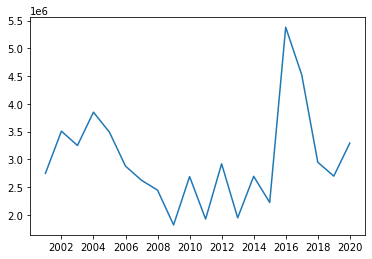

In [102]:
#---------------------------------------------------------------------
# Part 1: Create a figure and axis using plt.subplots
fig, ax = plt.subplots()
#---------------------------------------------------------------------

# Part 2: Plot, modify, plot again, include text, etc.
ax.plot( df_country.index, df_country['umd_tree_cover_loss__ha'] )
#Format axes
#ax.xaxis.set_major_locator( mdates.YearLocator(1,1,1 ))
#ax.xaxis.set_major_formatter( mdates.DateFormatter('%Y') ) 
#---------------------------------------------------------------------
# Part 3: Show, save to file, and close
plt.show( fig ) 
plt.close( fig )

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


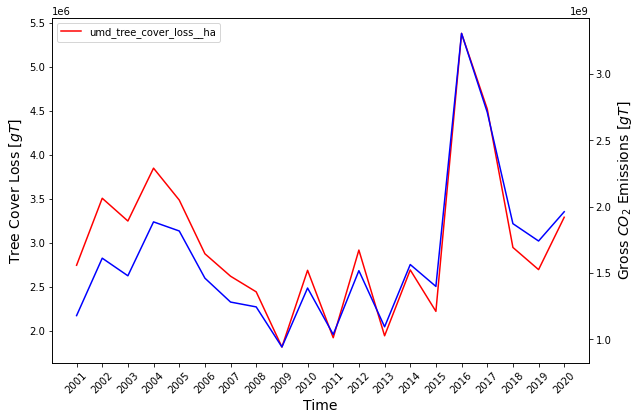

In [114]:

#---------------------------------------------------------------------
# Part 1: Create a figure and axis using plt.subplots
fig, ax = plt.subplots( figsize=(9,6) )
plt.xticks(rotation=45)

ax_right = ax.twinx()
#---------------------------------------------------------------------

# Part 2: Plot, modify, plot again, include text, etc.
ax.plot( df_country.index, df_country['umd_tree_cover_loss__ha'], color='red', label='umd_tree_cover_loss__ha' )
# ax.plot( df_country.index[0], [0], color='blue', label='gfw_gross_emissions_co2e_all_gases__Mg' ) # Trick: doesn't print anything, only used to get the legend

ax_right.plot( df_country.index, df_country['gfw_gross_emissions_co2e_all_gases__Mg'], color='blue', label='gfw_gross_emissions_co2e_all_gases__Mg' )

#Format axes
ax.xaxis.set_major_locator( mdates.YearLocator(1,1,1 ))
ax.xaxis.set_major_formatter( mdates.DateFormatter('%Y') ) 

ax.set_xlabel( 'Time', fontsize=14 )
ax.set_ylabel( 'Tree Cover Loss $[gT]$', fontsize=14 )
ax_right.set_ylabel( 'Gross $CO_2$ Emissions $[gT]$', fontsize=14 )

#ax.set_ylim( [10,32] )
#ax_right.set_ylim( [20,100] )

ax_right.grid( False )

ax.legend( loc='upper left' )
#ax_right.legend( loc='top right' )

# fig.suptitle( 'Air conditions at the agroforestry plot\n ' + str( start.date() ), fontsize=18 )

#---------------------------------------------------------------------
# Part 3: Show, save to file, and close
fig.tight_layout( rect=[0,0,1,0.99] )
plt.savefig( 'temp-rh.eps', dpi=300 )
plt.show( fig ) 
plt.close( fig )
#---------------------------------------------------------------------